# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import covsirphy as cs
cs.__version__

'2.4.2'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [3]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

### The number of cases (JHU style)

In [4]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [5]:
print(data_loader.covid19dh_citation)

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (2019), https://ec.europa.eu/
Geloky (2019), https://geloky.com/
Istituto Nazionale di Statistica, Italia (2018), htt

In [6]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
141831,2020-07-07,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
141832,2020-07-08,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
141833,2020-07-09,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
141834,2020-07-10,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
141835,2020-07-11,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04


In [7]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
141831,2020-07-07,Colombia,Vichada,1,0,0,1
141832,2020-07-08,Colombia,Vichada,1,0,0,1
141833,2020-07-09,Colombia,Vichada,1,0,0,1
141834,2020-07-10,Colombia,Vichada,1,0,0,1
141835,2020-07-11,Colombia,Vichada,1,0,0,1


In [8]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
174,2020-07-07,6973,942,325,5706
175,2020-07-08,7048,951,325,5772
176,2020-07-09,7272,1071,325,5876
177,2020-07-10,7515,1211,325,5979
178,2020-07-11,7721,1302,325,6094


In [9]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-07-07,17716655,8642712,800078,8273865,0.045160,0.467011,0.088173
2020-07-08,18032505,8754148,806972,8471385,0.044751,0.469784,0.086974
2020-07-09,18364774,8906389,813775,8644610,0.044312,0.470717,0.086037
2020-07-10,18711249,9069792,820300,8821157,0.043840,0.471436,0.085081
2020-07-11,18712069,9070166,820302,8821601,0.043838,0.471439,0.085077


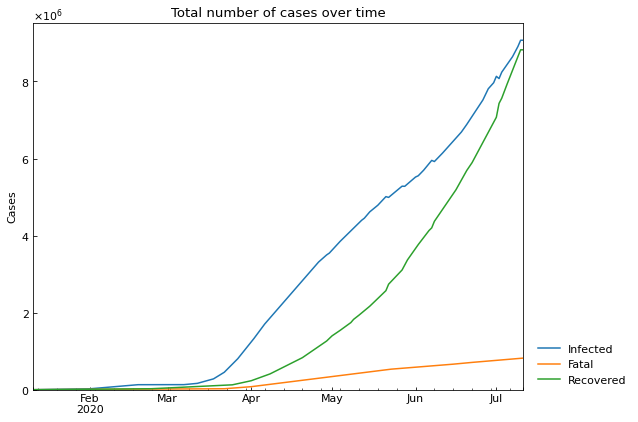

In [10]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [11]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
178,2020-07-07,20151,1982,979,17190
179,2020-07-08,20358,2052,981,17325
180,2020-07-09,20713,2271,981,17461
181,2020-07-10,21145,2517,981,17647
182,2020-07-11,21528,2706,982,17840


In [12]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [13]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
146,2020-07-06,19775,1674,977,17124
147,2020-07-07,19981,1806,978,17197
148,2020-07-08,20074,1763,980,17331
149,2020-07-09,20371,1924,981,17466
150,2020-07-10,20719,2085,982,17652


### Population in each country

In [14]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [15]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
141831,2020-07-07,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
141832,2020-07-08,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
141833,2020-07-09,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
141834,2020-07-10,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
141835,2020-07-11,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04


In [16]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Population
783,CZE,Czech Republic,Plzenský kraj,584672
784,COL,Colombia,Bolívar,2070110
785,RUS,Russia,Murmansk oblast,795409
786,RUS,Russia,Republic of Crimea,1913731
787,COL,Colombia,Vichada,107808


In [17]:
population_data.value("Japan", province=None)

126529100

In [18]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [19]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [20]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
141831,2020-07-07,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
141832,2020-07-08,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
141833,2020-07-09,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
141834,2020-07-10,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
141835,2020-07-11,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04


In [21]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
141831,2020-07-07,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
141832,2020-07-08,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
141833,2020-07-09,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
141834,2020-07-10,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
141835,2020-07-11,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04


In [22]:
# Subset for a country
oxcgrt_data.subset(country="Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
178,2020-07-07,2,0,1,0,0,0,0,3,2,2,1,27.78
179,2020-07-08,2,0,1,0,0,0,0,3,2,2,1,27.78
180,2020-07-09,2,0,1,0,0,0,0,3,2,2,1,27.78
181,2020-07-10,2,0,1,0,0,0,0,3,2,2,1,27.78
182,2020-07-11,2,0,1,0,0,0,0,3,2,2,1,27.78


In [23]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset(iso3="JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
178,2020-07-07,2,0,1,0,0,0,0,3,2,2,1,27.78
179,2020-07-08,2,0,1,0,0,0,0,3,2,2,1,27.78
180,2020-07-09,2,0,1,0,0,0,0,3,2,2,1,27.78
181,2020-07-10,2,0,1,0,0,0,0,3,2,2,1,27.78
182,2020-07-11,2,0,1,0,0,0,0,3,2,2,1,27.78


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [24]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

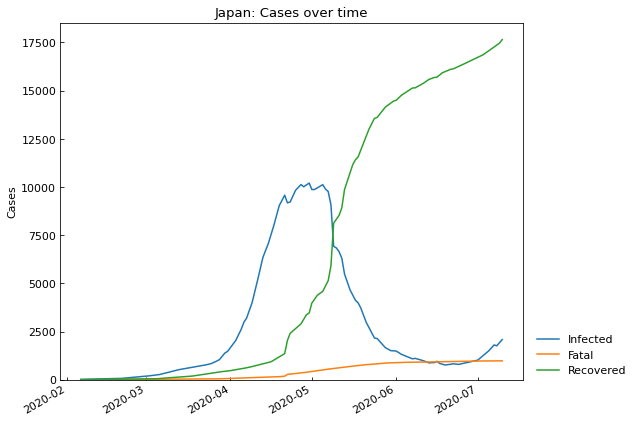

,Date,Confirmed,Infected,Fatal,Recovered
146,2020-07-06,19775,1674,977,17124
147,2020-07-07,19981,1806,978,17197
148,2020-07-08,20074,1763,980,17331
149,2020-07-09,20371,1924,981,17466
150,2020-07-10,20719,2085,982,17652


In [25]:
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

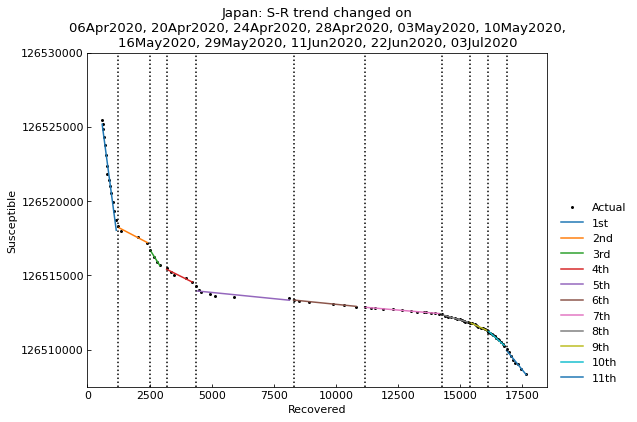

,Type,Start,End,Population
1st,Past,06Apr2020,19Apr2020,126529100
2nd,Past,20Apr2020,23Apr2020,126529100
3rd,Past,24Apr2020,27Apr2020,126529100
4th,Past,28Apr2020,02May2020,126529100
5th,Past,03May2020,09May2020,126529100
6th,Past,10May2020,15May2020,126529100
7th,Past,16May2020,28May2020,126529100
8th,Past,29May2020,10Jun2020,126529100
9th,Past,11Jun2020,21Jun2020,126529100
10th,Past,22Jun2020,02Jul2020,126529100


In [26]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [27]:
scenario.estimate(cs.SIRF)


<Main scenario: perform parameter estimation>

Running optimization with 8 CPUs...

	11th phase with SIR-F model finished 317 trials in 0 min 35 sec.

	2nd phase with SIR-F model finished 120 trials in 0 min 15 sec.

	3rd phase with SIR-F model finished 145 trials in 0 min 20 sec.

	1st phase with SIR-F model finished 337 trials in 0 min 46 sec.

	4th phase with SIR-F model finished 175 trials in 0 min 25 sec.

	6th phase with SIR-F model finished 85 trials in 0 min 15 sec.

	7th phase with SIR-F model finished 104 trials in 0 min 15 sec.

	5th phase with SIR-F model finished 260 trials in 0 min 40 sec.

	8th phase with SIR-F model finished 33 trials in 0 min 5 sec.

	9th phase with SIR-F model finished 70 trials in 0 min 10 sec.

	10th phase with SIR-F model finished 194 trials in 0 min 20 sec.

Completed optimization. Total: 2 min 26 sec

In [28]:
scenario.summary()

,Type,Start,End,Population,ODE,rho,sigma,theta,kappa,tau,Rt,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
1st,Past,06Apr2020,19Apr2020,126529100,SIR-F,0.023461,0.002278,0.000207,0.000257,360,9.26,0.000,974,10,109,0.100903,337,0 min 46 sec
2nd,Past,20Apr2020,23Apr2020,126529100,SIR-F,0.010632,0.012520,0.013200,0.000400,360,0.81,0.013,624,23,19,0.093550,120,0 min 15 sec
3rd,Past,24Apr2020,27Apr2020,126529100,SIR-F,0.009008,0.003317,0.028190,0.000067,360,2.59,0.028,3711,27,75,0.006564,145,0 min 20 sec
4th,Past,28Apr2020,02May2020,126529100,SIR-F,0.006169,0.006537,0.090838,0.000180,360,0.84,0.091,1388,40,38,0.031318,175,0 min 25 sec
5th,Past,03May2020,09May2020,126529100,SIR-F,0.003381,0.013091,0.235723,0.000059,360,0.20,0.236,4221,73,19,0.113626,260,0 min 40 sec
6th,Past,10May2020,15May2020,126529100,SIR-F,0.005218,0.021818,0.216201,0.000768,360,0.18,0.216,325,47,11,0.062930,85,0 min 15 sec
7th,Past,16May2020,28May2020,126529100,SIR-F,0.003137,0.023050,0.469776,0.000450,360,0.07,0.470,555,79,10,0.090957,104,0 min 15 sec
8th,Past,29May2020,10Jun2020,126529100,SIR-F,0.008962,0.014992,0.157772,0.001978,360,0.44,0.158,126,27,16,0.081916,33,0 min 5 sec
9th,Past,11Jun2020,21Jun2020,126529100,SIR-F,0.020197,0.024748,0.000559,0.001682,360,0.76,0.001,148,12,10,0.039269,70,0 min 10 sec
10th,Past,22Jun2020,02Jul2020,126529100,SIR-F,0.028275,0.018418,0.099728,0.001218,360,1.30,0.100,205,8,13,0.065460,194,0 min 20 sec


### Accuracy of estimation

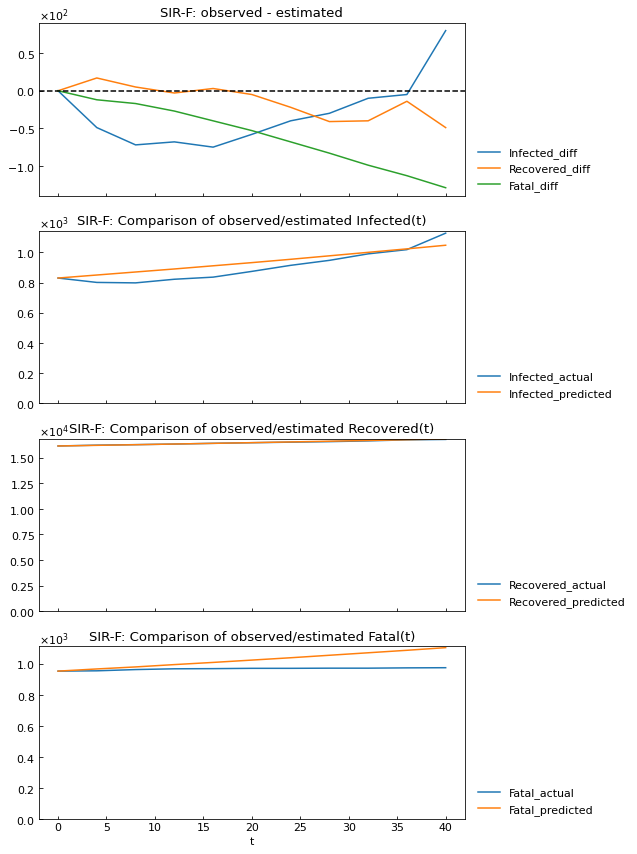

In [29]:
scenario.estimate_accuracy(phase="10th")

### Get parameter value

In [30]:
scenario.get("Rt", phase="4th")

0.84

### Show parameter history

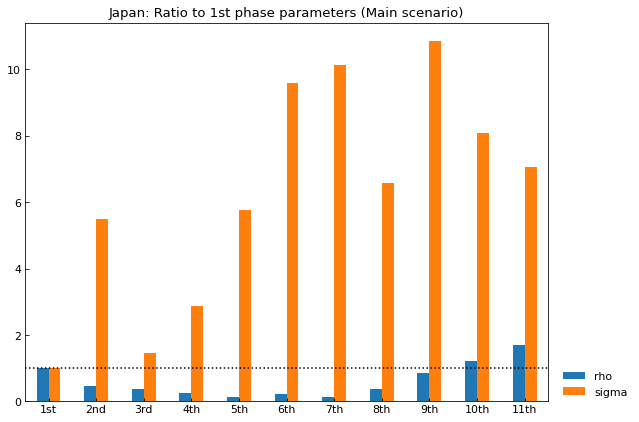

,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,11th
rho,1.0,0.453156,0.383939,0.262966,0.144110,0.222393,0.133701,0.381977,0.860888,1.205181,1.691152
sigma,1.0,5.497055,1.456497,2.869996,5.747742,9.579364,10.120562,6.582445,10.865806,8.086780,7.063784


In [31]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

### Show the history of reproduction number

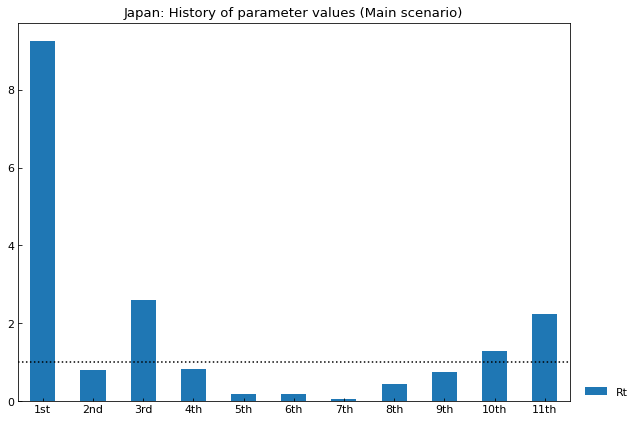

,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,11th
Rt,9.26,0.81,2.59,0.84,0.2,0.18,0.07,0.44,0.76,1.3,2.23


In [32]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

### Simulate the number of cases

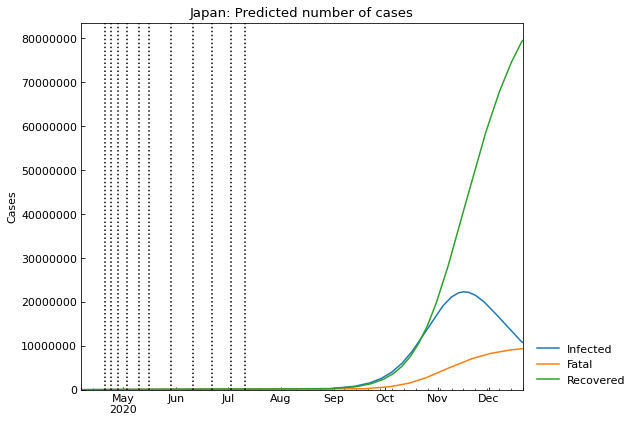

,Date,Fatal,Infected,Recovered,Susceptible
255,17Dec2020,9216276,12056789,76954357,28301677
256,18Dec2020,9259863,11667823,77717696,27883717
257,19Dec2020,9301529,11286137,78456236,27485197
258,20Dec2020,9341358,10912067,79170456,27105219
259,21Dec2020,9365420,10681958,79605633,26876088


In [33]:
scenario.clear(name="Main")
scenario.add_phase(name="Main", end_date="01Jan2021")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [34]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.016088277114980398

In [35]:
sigma_new = sigma_current * 2
sigma_new

0.032176554229960797

In [36]:
scenario.clear(name="Medicine")
scenario.add_phase(name="Medicine", days=30, sigma=sigma_current)
scenario.add_phase(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE       rho  \
Scenario Phase                                                              
Main     1st      Past  06Apr2020  19Apr2020   126529100  SIR-F  0.023461   
         2nd      Past  20Apr2020  23Apr2020   126529100  SIR-F  0.010632   
         3rd      Past  24Apr2020  27Apr2020   126529100  SIR-F  0.009008   
         4th      Past  28Apr2020  02May2020   126529100  SIR-F  0.006169   
         5th      Past  03May2020  09May2020   126529100  SIR-F  0.003381   
         6th      Past  10May2020  15May2020   126529100  SIR-F  0.005218   
         7th      Past  16May2020  28May2020   126529100  SIR-F  0.003137   
         8th      Past  29May2020  10Jun2020   126529100  SIR-F  0.008962   
         9th      Past  11Jun2020  21Jun2020   126529100  SIR-F  0.020197   
         10th     Past  22Jun2020  02Jul2020   126529100  SIR-F  0.028275   
         11th     Past  03Jul2020  10Jul2020   126529100  SIR-F  0.039676   
         12th   Future  11Jul2020  01Jan2021   126529100  SIR-F  0.039676   
Medicine 1st      Past  06Apr2020  19Apr2020   126529100  SIR-F  0.023461   
         2nd      Past  20Apr2020  23Apr2020   126529100  SIR-F  0.010632   
         3rd      Past  24Apr2020  27Apr2020   126529100  SIR-F  0.009008   
         4th      Past  28Apr2020  02May2020   126529100  SIR-F  0.006169   
         5th      Past  03May2020  09May2020   126529100  SIR-F  0.003381   
         6th      Past  10May2020  15May2020   126529100  SIR-F  0.005218   
         7th      Past  16May2020  28May2020   126529100  SIR-F  0.003137   
         8th      Past  29May2020  10Jun2020   126529100  SIR-F  0.008962   
         9th      Past  11Jun2020  21Jun2020   126529100  SIR-F  0.020197   
         10th     Past  22Jun2020  02Jul2020   126529100  SIR-F  0.028275   
         11th     Past  03Jul2020  10Jul2020   126529100  SIR-F  0.039676   
         12th   Future  11Jul2020  10Aug2020   126529100  SIR-F  0.039676   
         13th   Future  11Aug2020  01Jan2021   126529100  SIR-F  0.039676   

                   sigma     theta     kappa  tau    Rt  alpha1 [-]  \
Scenario Phase                                                        
Main     1st    0.002278  0.000207  0.000257  360  9.26       0.000   
         2nd    0.012520  0.013200  0.000400  360  0.81       0.013   
         3rd    0.003317  0.028190  0.000067  360  2.59       0.028   
         4th    0.006537  0.090838  0.000180  360  0.84       0.091   
         5th    0.013091  0.235723  0.000059  360  0.20       0.236   
         6th    0.021818  0.216201  0.000768  360  0.18       0.216   
         7th    0.023050  0.469776  0.000450  360  0.07       0.470   
         8th    0.014992  0.157772  0.001978  360  0.44       0.158   
         9th    0.024748  0.000559  0.001682  360  0.76       0.001   
         10th   0.018418  0.099728  0.001218  360  1.30       0.100   
         11th   0.016088  0.085974  0.000161  360  2.23       0.086   
         12th   0.016088  0.085974  0.000161  360  2.23       0.086   
Medicine 1st    0.002278  0.000207  0.000257  360  9.26       0.000   
         2nd    0.012520  0.013200  0.000400  360  0.81       0.013   
         3rd    0.003317  0.028190  0.000067  360  2.59       0.028   
         4th    0.006537  0.090838  0.000180  360  0.84       0.091   
         5th    0.013091  0.235723  0.000059  360  0.20       0.236   
         6th    0.021818  0.216201  0.000768  360  0.18       0.216   
         7th    0.023050  0.469776  0.000450  360  0.07       0.470   
         8th    0.014992  0.157772  0.001978  360  0.44       0.158   
         9th    0.024748  0.000559  0.001682  360  0.76       0.001   
         10th   0.018418  0.099728  0.001218  360  1.30       0.100   
         11th   0.016088  0.085974  0.000161  360  2.23       0.086   
         12th   0.016088  0.085974  0.000161  360  2.23       0.086   
         13th   0.032177  0.085974  0.000161  360  1.12       0.086   

                1/al

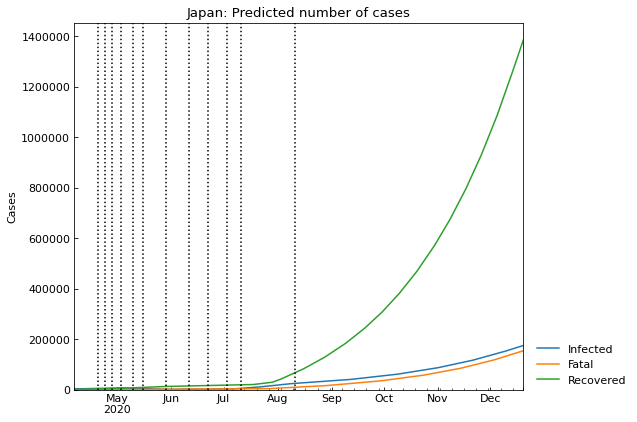

,Date,Fatal,Infected,Recovered,Susceptible
254,16Dec2020,145574,166593,1305424,124911508
255,17Dec2020,147941,168915,1327015,124885227
256,18Dec2020,150341,171264,1348906,124858587
257,19Dec2020,152774,173640,1371102,124831583
258,20Dec2020,154311,175138,1385118,124814533


In [37]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [38]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 21Dec2020,Fatal on 21Dec2020,Infected on 20Dec2020,Fatal on 20Dec2020
Main,22293238,17Nov2020,10681958.0,9365420.0,NaN,NaN
Medicine,175138,20Dec2020,NaN,NaN,175138.0,154311.0
